In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*60)
print("SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION")
print("="*60)

SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION


In [3]:
print("\n1. Loading and Preparing Dataset")
print("-" * 40)

# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Classes: {data.target_names}")
print(f"Class distribution: {np.bincount(y)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")



1. Loading and Preparing Dataset
----------------------------------------
Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Classes: ['malignant' 'benign']
Class distribution: [212 357]
Training set shape: (455, 30)
Test set shape: (114, 30)


In [4]:
print("\n2. Training SVM with Linear Kernel")
print("-" * 40)

# Linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test_scaled)

# Evaluation
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {accuracy_linear:.4f}")

# Cross-validation
cv_scores_linear = cross_val_score(svm_linear, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores (Linear): {cv_scores_linear}")
print(f"Mean CV Score (Linear): {cv_scores_linear.mean():.4f} (+/- {cv_scores_linear.std() * 2:.4f})")


2. Training SVM with Linear Kernel
----------------------------------------
Linear SVM Accuracy: 0.9737
Cross-validation scores (Linear): [0.95604396 0.95604396 0.95604396 0.98901099 0.97802198]
Mean CV Score (Linear): 0.9670 (+/- 0.0278)


In [5]:
print("\n3. Training SVM with RBF Kernel")
print("-" * 40)

# RBF SVM
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluation
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM Accuracy: {accuracy_rbf:.4f}")

# Cross-validation
cv_scores_rbf = cross_val_score(svm_rbf, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores (RBF): {cv_scores_rbf}")
print(f"Mean CV Score (RBF): {cv_scores_rbf.mean():.4f} (+/- {cv_scores_rbf.std() * 2:.4f})")



3. Training SVM with RBF Kernel
----------------------------------------
RBF SVM Accuracy: 0.9825
Cross-validation scores (RBF): [0.95604396 0.98901099 0.94505495 0.97802198 0.98901099]
Mean CV Score (RBF): 0.9714 (+/- 0.0357)


In [6]:
print("\n4. Hyperparameter Tuning")
print("-" * 40)

# Grid search for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Test Accuracy: {accuracy_best:.4f}")




4. Hyperparameter Tuning
----------------------------------------
Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation score: 0.9802
Best SVM Test Accuracy: 0.9825


In [7]:
print("\n5. Detailed Classification Reports")
print("-" * 40)

print("\nLinear SVM Classification Report:")
print(classification_report(y_test, y_pred_linear, target_names=data.target_names))

print("\nRBF SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf, target_names=data.target_names))

print("\nBest SVM Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=data.target_names))



5. Detailed Classification Reports
----------------------------------------

Linear SVM Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


RBF SVM Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Best SVM Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    a


6. Creating 2D Visualization
----------------------------------------


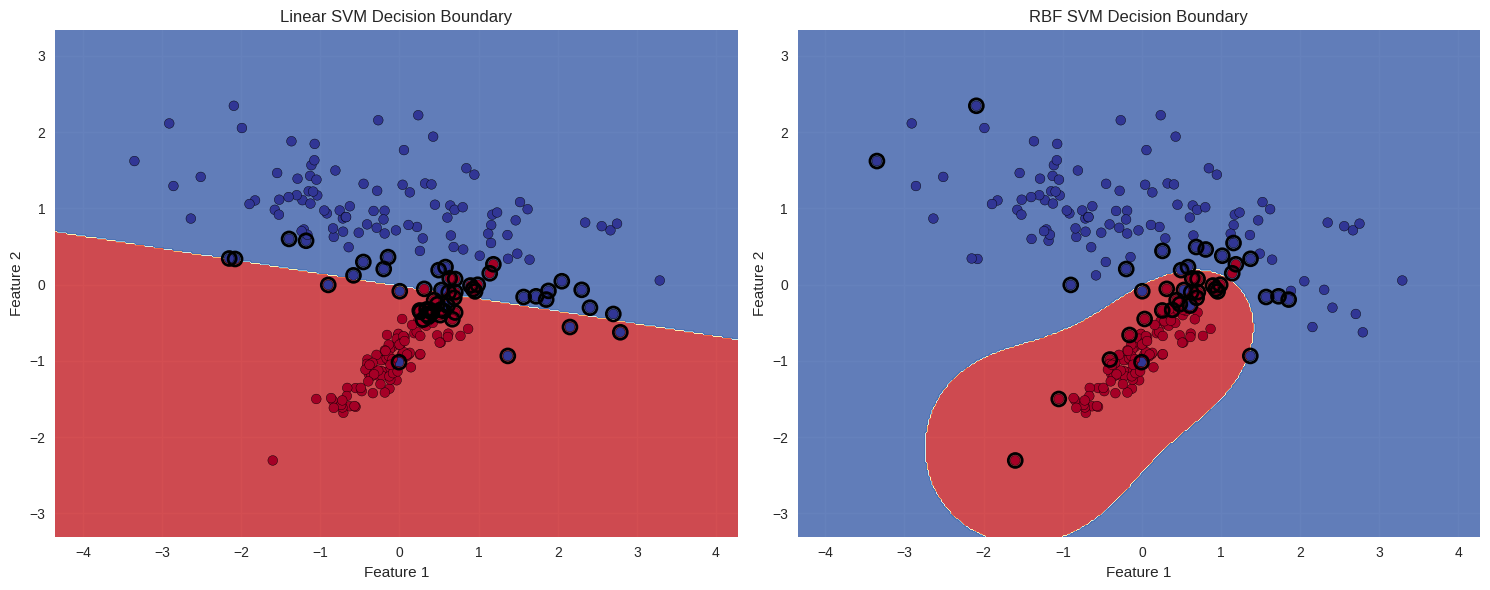

In [8]:
print("\n6. Creating 2D Visualization")
print("-" * 40)

# Create a 2D dataset for visualization
X_2d, y_2d = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    random_state=42, n_clusters_per_class=1
)

# Scale the 2D data
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Split 2D data
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d_scaled, y_2d, test_size=0.2, random_state=42
)

# Train both kernels on 2D data
svm_linear_2d = SVC(kernel='linear', C=1.0)
svm_rbf_2d = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_linear_2d.fit(X_train_2d, y_train_2d)
svm_rbf_2d.fit(X_train_2d, y_train_2d)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

def plot_decision_boundary(X, y, model, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # Plot support vectors
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                  s=100, facecolors='none', edgecolors='black', linewidth=2)

# Plot decision boundaries
plot_decision_boundary(X_train_2d, y_train_2d, svm_linear_2d, axes[0], 'Linear SVM Decision Boundary')
plot_decision_boundary(X_train_2d, y_train_2d, svm_rbf_2d, axes[1], 'RBF SVM Decision Boundary')

plt.tight_layout()
plt.show()



7. Confusion Matrices
----------------------------------------


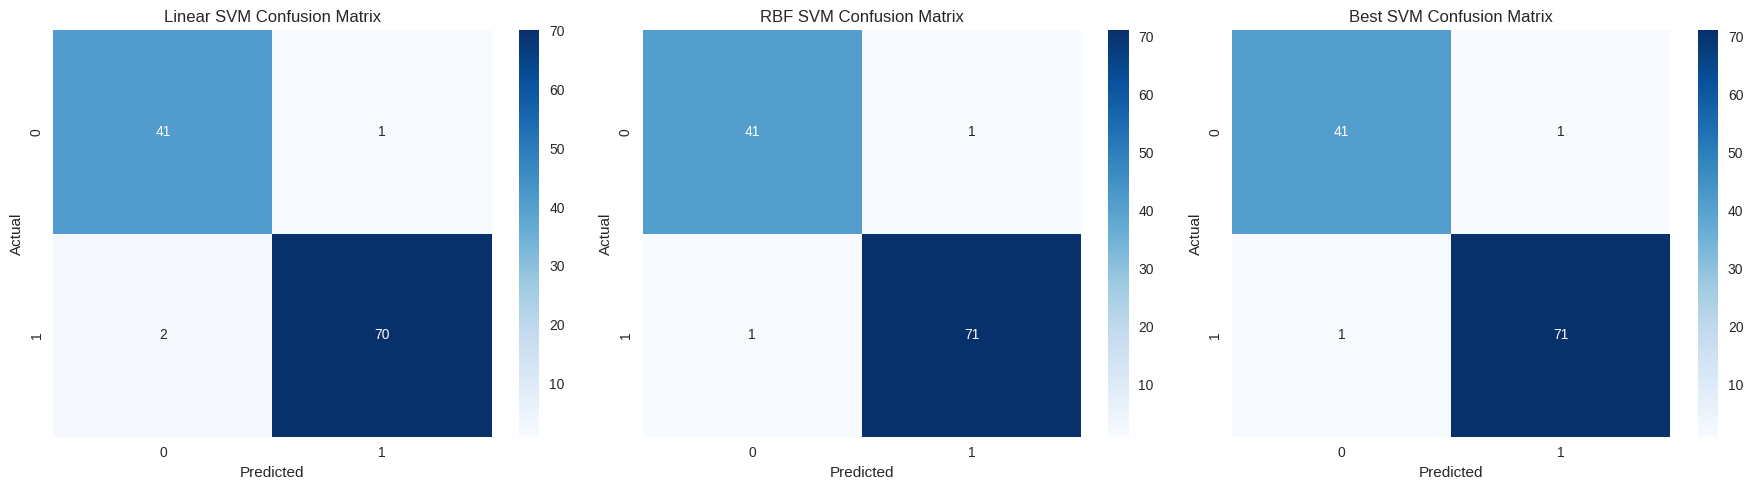

In [9]:
print("\n7. Confusion Matrices")
print("-" * 40)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion matrices
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrices
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Linear SVM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('RBF SVM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Best SVM Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [10]:
print("\n8. Model Comparison Summary")
print("-" * 40)

models_comparison = {
    'Model': ['Linear SVM', 'RBF SVM', 'Best SVM (Tuned)'],
    'Test Accuracy': [accuracy_linear, accuracy_rbf, accuracy_best],
    'CV Score': [cv_scores_linear.mean(), cv_scores_rbf.mean(), grid_search.best_score_]
}

import pandas as pd
comparison_df = pd.DataFrame(models_comparison)
print(comparison_df.to_string(index=False))


8. Model Comparison Summary
----------------------------------------
           Model  Test Accuracy  CV Score
      Linear SVM       0.973684  0.967033
         RBF SVM       0.982456  0.971429
Best SVM (Tuned)       0.982456  0.980220



9. Feature Importance Analysis
----------------------------------------
Top 10 Most Important Features (Linear SVM):
 1. worst texture                  1.3852
 2. worst smoothness               0.9293
 3. area error                     0.7946
 4. mean compactness               0.7613
 5. worst area                     0.7342
 6. radius error                   0.7088
 7. worst concavity                0.6883
 8. worst perimeter                0.5872
 9. perimeter error                0.5849
10. worst radius                   0.5624


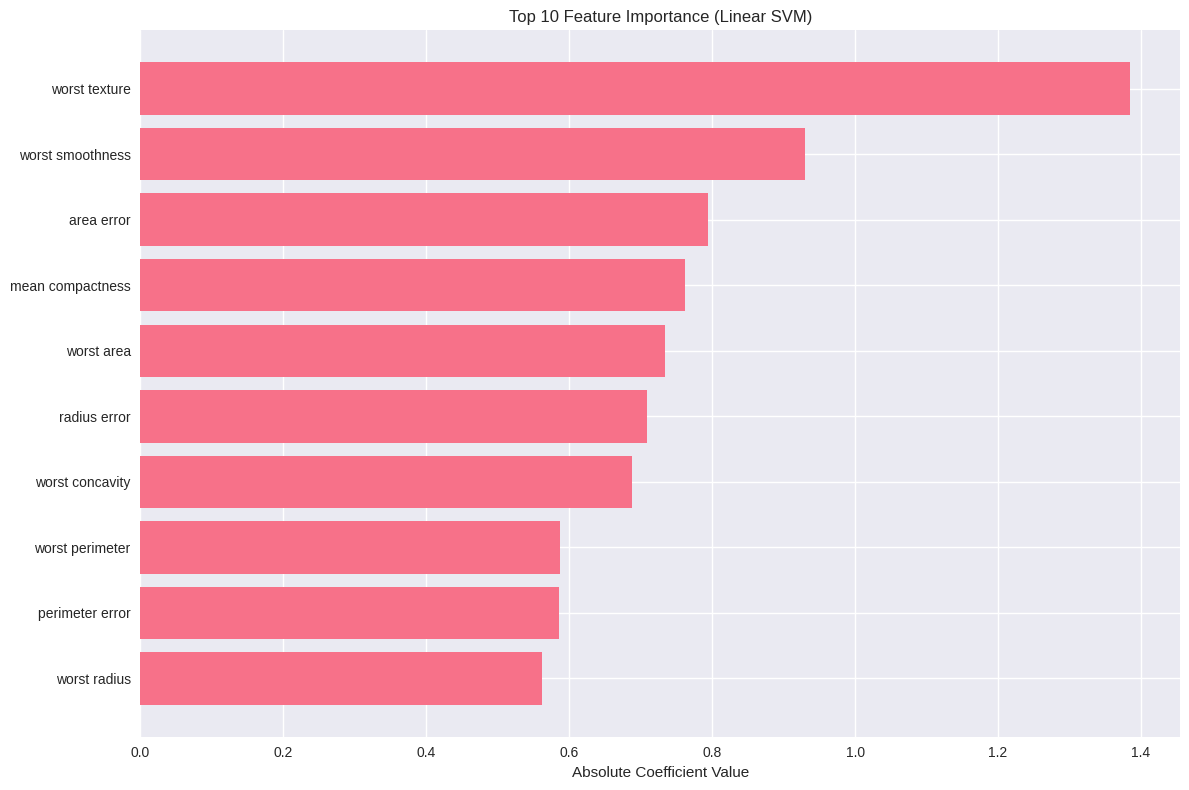

In [11]:
print("\n9. Feature Importance Analysis")
print("-" * 40)

# Get feature importance from linear SVM
feature_importance = np.abs(svm_linear.coef_[0])
feature_names = data.feature_names

# Get top 10 most important features
top_features_idx = np.argsort(feature_importance)[-10:]
top_features = [(feature_names[i], feature_importance[i]) for i in top_features_idx]

print("Top 10 Most Important Features (Linear SVM):")
for i, (feature, importance) in enumerate(reversed(top_features)):
    print(f"{i+1:2d}. {feature:<30} {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features)), [imp for _, imp in top_features])
plt.yticks(range(len(top_features)), [feat for feat, _ in top_features])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importance (Linear SVM)')
plt.tight_layout()
plt.show()